## Bienvenidos a la clase de ANOVA

## Teoría


<h3>¿Qué es ANOVA (ANalysis Of VAriance)?</h3><ol>
<li>Se utiliza para comparar la media de 2 grupos o más (el t-test solo compara dos grupos).</li>
<li>La diferencia de medias se basa en en análisis de la varianza.</li>
<li>Existen dos principales tipos: ANOVA de una vía (un factor) y de dos vías (dos factores). Un factor es una variable independiente.</li>
</ol>



<h3>Hipótesis de ANOVA</h3><ol>
<li>Hipótesis Nula: La media de los grupos son iguales (No hay variación significativa en la media de los grupos)</li>
<li>Hipótesis Alterna: Al menos una de las medias es diferente a las demás.</li>
</ol>

$H_0: \forall i,j | \mu_i = \mu_j$ <br>
$H_1: \exists i,j | \mu_i \neq \mu_j$

<h3>Supuestos de ANOVA</h3><ol>
<li>Los residuos (error experimental) están distribuidos normalmente. (Test Shapiro Wilks)</li>
<li>Homoscedasticidad (las varianzas son iguales entre los tratamientos) (Test Levene o Bartlett)</li>
<li>Las observaciones son independientes e identicamente distribuidas.</li>
</ol>


<h3>¿Cómo funciona ANOVA?</h3><ol>
<li>Tamaño de la muestra: Cantidad igual de datos en cada tratamiento.</li>
<li> Calcular el MS de cada grupo $ MS_{grupo} = \frac{\sum_{i \in a}SS_i}{k}$: k = niveles-1.  Son los grados de libertad (df) para un grupo.</li>
<li> Calcular MSE:  $MSE =  \frac{\sum_{i \in a}SS_{error}}{num_{datos}-k}$</li>
<li>Calcular F-value $\frac{MS_{grupo}}{MSE}$</li>
</ol>



<h3>ANOVA de una vía</h3>


In [1]:
# load packages
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

In [2]:
d.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


<p>Aquí, hay cuatro tratamientos (A, B, C y D), que son grupos para el análisis ANOVA. Los tratamientos son variables independientes y se denominan factor. Como hay cuatro tipos de tratamientos, el factor de tratamiento tiene cuatro niveles.</p>


<p>Para este diseño experimental, solo hay un factor (tratamientos) o una variable independiente para evaluar, y por lo tanto, ANOVA a una vía es suficiente.</p>


<h3 id="AnÃ¡lisis-descriptivo">Análisis descriptivo</h3>

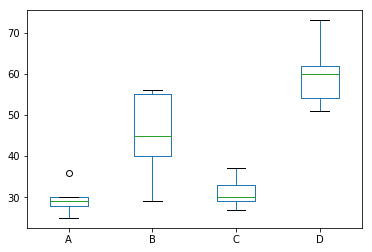

In [3]:
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

Las funciones ``stats.f_oneway`` recibe los grupos y retorna el F-value y el p-value.

In [4]:
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [13]:
# reacomoda los datos para que el paquede lo pueda leer 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
display(d_melt)
# Reemplaza el no,bre de las columnas
d_melt.columns = ['index', 'treatments', 'value']
# Modelo Ordinary Least Squares (OLS)
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [14]:
d_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


<h3 id="InterpretaciÃ³n:">Interpretación:</h3><p>El valor P obtenido del análisis ANOVA es significativo (P &lt;0.05) y, por lo tanto, concluimos que existen diferencias significativas entre los tratamientos.</p>


<h3 id="ComparaciÃ³n-entre-pares-de-tratamiento">Comparacón entre pares de tratamiento</h3><p>Según el análisis de ANOVA, sabemos que las diferencias de tratamiento son estadísticamente significativas, pero ANOVA no dice qué tratamientos son significativamente diferentes entre sí. Para conocer los pares de tratamientos diferentes significativos, realizaremos análisis de comparación múltiple por pares (comparación post-hoc) usando la prueba Tukey HSD.</p>

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,15.4,0.0251,1.6929,29.1071,True
A,C,1.6,0.9,-12.1071,15.3071,False
A,D,30.4,0.001,16.6929,44.1071,True
B,C,-13.8,0.0482,-27.5071,-0.0929,True
B,D,15.0,0.0296,1.2929,28.7071,True
C,D,28.8,0.001,15.0929,42.5071,True


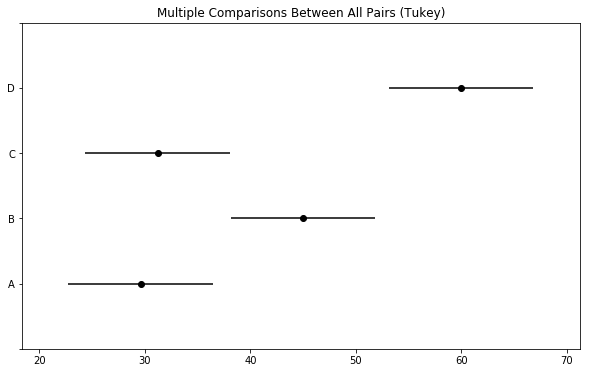

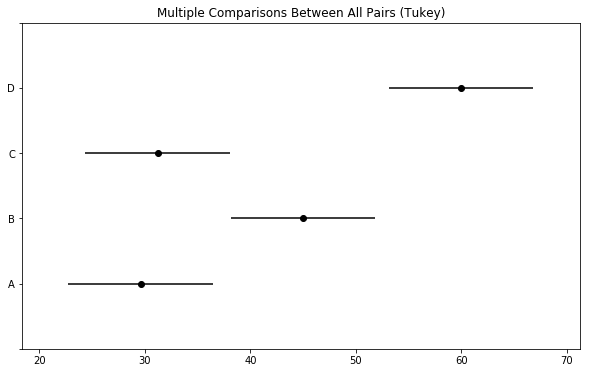

In [15]:
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
display(m_comp.summary())
m_comp.plot_simultaneous()


<h3 id="InterpretaciÃ³n">Interpretación</h3><p>Los resultados anteriores de Tukey HSD sugieren que, excepto A-C, todas las demás comparaciones por pares para tratamientos rechazan la hipótesis nula e indican diferencias estadísticamente significativas.</p>



<h3 id="Test-ANOVA-assumptions">Supuestos de Test ANOVA</h3>



<p>La prueba de Levene se puede utilizar para verificar la homogeneidad de las varianzas. Hipótesis nula: las muestras de poblaciones tienen varianzas iguales.</p>


In [16]:
w, pvalue = stats.levene(d['A'], d['B'], d['C'], d['D'])
print(w, pvalue)

1.9219593192195938 0.16673281219949276



<p>Como el valor P no es significativo (&gt; 0.05), no podemos rechazar la hipótesis nula de igualdad de varianzas.</p>



<p>La prueba de Shapiro-Wilk se puede usar para verificar la distribución normal de los residuos. Hipótesis nula: los datos provienen de una distribución normal.</p>


In [17]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603



<p>Como el valor P no es significativo, no podemos rechazar la hipótesis nula y concluir que los datos se extraen de la distribución normal.</p>



<h3 id="Two-way-(two-factor)-ANOVA">ANOVA de dos factores</h3>



<p>Del conjunto de datos, hay dos factores (variables independientes) a saber. genotipos y rendimiento en años. Los genotipos y los años tienen cinco y tres niveles respectivamente (ver ANOVA unidireccional para conocer factores y niveles).</p>
<p>Para este diseño experimental, hay dos factores a evaluar y, por lo tanto, el ANOVA de dos vías es adecuado para el análisis. Aquí, usando ANOVA de dos vías, podemos evaluar simultáneamente cómo el tipo de genotipo y los años afectan los rendimientos de las plantas. Si aplica ANOVA unidireccional aquí, puede evaluar solo un factor a la vez.</p>
<p>A partir de ANOVA de dos vías, podemos probar tres hipótesis: <ol>
   <li> Efecto del genotipo en el rendimiento </li>
   <li> Efecto del tiempo (años) en el rendimiento y </li>
   <li> Efecto de las interacciones genotipo y tiempo (años) en el rendimiento.</li></ol></p>


In [75]:
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95



<h3 id="AnÃ¡lisis-descriptivo">Análisis descriptivo</h3>


,Genotype,variable,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


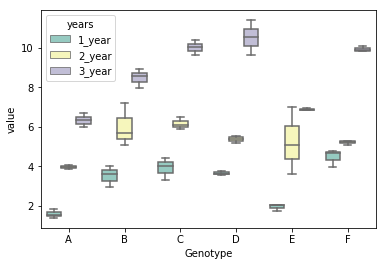

In [76]:


d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
display(d_melt)

d_melt.columns = ['Genotype', 'years', 'value']

sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [77]:
d_melt.columns

Index(['Genotype', 'years', 'value'], dtype='object')

In [78]:
d_melt['Genotype'].value_counts()

E    9
F    9
D    9
B    9
A    9
C    9
Name: Genotype, dtype: int64

In [79]:
d_melt['years'].value_counts()

3_year    18
1_year    18
2_year    18
Name: years, dtype: int64

In [80]:
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN



<h3 id="InterpretaciÃ³n:">Interpretación:</h3><p>El valor P obtenido del análisis ANOVA para el genotipo, los años y la interacción son estadísticamente significativos (P &lt;0.05). Llegamos a la conclusión de que el tipo de genotipo afecta significativamente el resultado de rendimiento, el tiempo (años) afecta significativamente el resultado de rendimiento, y la interacción de ambos genotipo y el tiempo (años) afecta significativamente el resultado del rendimiento.</p>
<p>Ahora, sabemos que (años) diferencias genotípicas y de tiempo son estadísticamente significativos, pero ANOVA no le dice a la cual el genotipo y el tiempo (años) son significativamente diferentes entre sí. Para conocer los pares de genotipos y tiempos (años) significativamente diferentes, realice análisis de comparación múltiple por pares (comparación post-hoc) utilizando la prueba Tukey HSD.</p>



<p>Similar al ANOVA a una vía, puede usar las pruebas de Levene y Shapiro-Wilk para validar los supuestos de homogeneidad de las variaciones y la distribución normal de los residuos.</p>


In [81]:
# d.head()

In [82]:
d_melt.columns

Index(['Genotype', 'years', 'value'], dtype='object')

In [83]:
# d = d_melt
dc = d.copy()
dc = dc.set_index('Genotype').T

In [84]:

df = dc
dc

Genotype,A,A,A,B,B,B,C,C,C,D,D,D,E,E,E,F,F,F
1_year,1.53,1.83,1.38,3.60,2.94,4.02,3.99,3.30,4.41,3.75,3.63,3.57,1.71,2.01,2.04,3.96,4.77,4.65
2_year,4.08,3.84,3.96,5.70,5.07,7.20,6.09,5.88,6.51,5.19,5.37,5.55,3.60,5.10,6.99,5.25,5.28,5.07
3_year,6.69,5.97,6.33,8.55,7.95,8.94,10.02,9.63,10.38,11.40,9.66,10.53,6.87,6.93,6.84,9.84,9.87,10.08


In [85]:
df =df.groupby(df.columns.values, axis=1).agg(lambda x: x.values.tolist()).sum().apply(pd.Series).T#.sort_values('pp')
df

,A,B,C,D,E,F
0,1.53,3.60,3.99,3.75,1.71,3.96
1,1.83,2.94,3.30,3.63,2.01,4.77
2,1.38,4.02,4.41,3.57,2.04,4.65
3,4.08,5.70,6.09,5.19,3.60,5.25
4,3.84,5.07,5.88,5.37,5.10,5.28
5,3.96,7.20,6.51,5.55,6.99,5.07
6,6.69,8.55,10.02,11.40,6.87,9.84
7,5.97,7.95,9.63,9.66,6.93,9.87
8,6.33,8.94,10.38,10.53,6.84,10.08


In [86]:
w, pvalue = stats.levene(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'])
print(w, pvalue)

0.2046984008809889 0.9589434083738608


con pvalue >0.05 no se rechasa la HO: de igualdadde varianzas

In [87]:
w, pvalue = stats.levene(d['1_year'], d['2_year'], d['3_year'])
print(w, pvalue)

3.7640414132406605 0.02987100822975102


con pvalue <0.05 se rechasa la HO: de igualdadde varianzas

In [88]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8978845477104187 0.00023986827000044286


con pvalue <0.05 se rechaza H0: los datos no son de una distribucion normal.

In [89]:
# d_melt

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,2.04,0.5304,-1.5094,5.5894,False
A,C,2.7333,0.22,-0.816,6.2827,False
A,D,2.56,0.2847,-0.9894,6.1094,False
A,E,0.72,0.9,-2.8294,4.2694,False
A,F,2.5733,0.2793,-0.976,6.1227,False
B,C,0.6933,0.9,-2.856,4.2427,False
B,D,0.52,0.9,-3.0294,4.0694,False
B,E,-1.32,0.8679,-4.8694,2.2294,False
B,F,0.5333,0.9,-3.016,4.0827,False
C,D,-0.1733,0.9,-3.7227,3.376,False


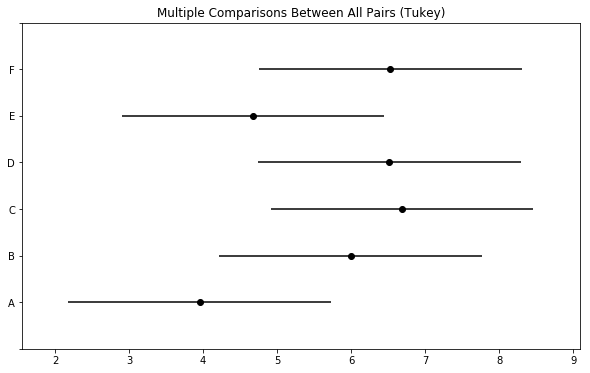

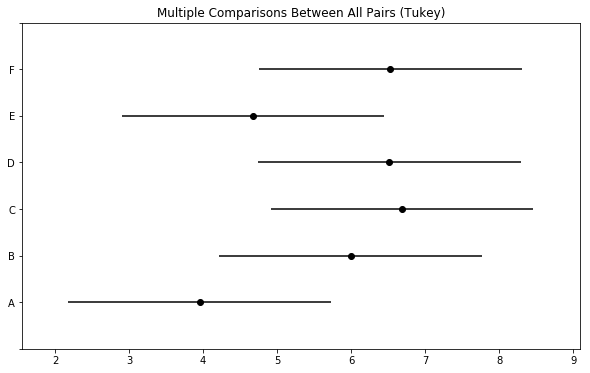

In [90]:
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['Genotype'], alpha=0.05)
display(m_comp.summary())
m_comp.plot_simultaneous()

group1,group2,meandiff,p-adj,lower,upper,reject
1_year,2_year,2.1467,0.001,1.0864,3.2069,True
1_year,3_year,5.5217,0.001,4.4614,6.5819,True
2_year,3_year,3.375,0.001,2.3147,4.4353,True


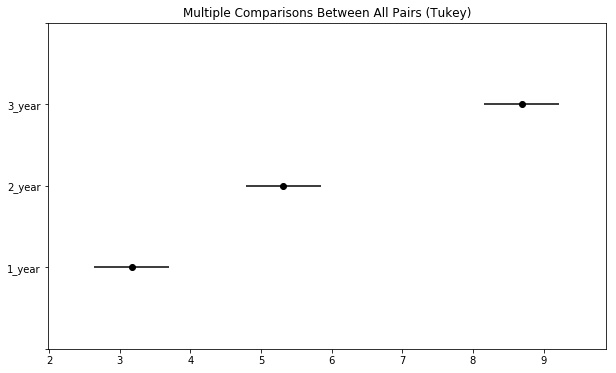

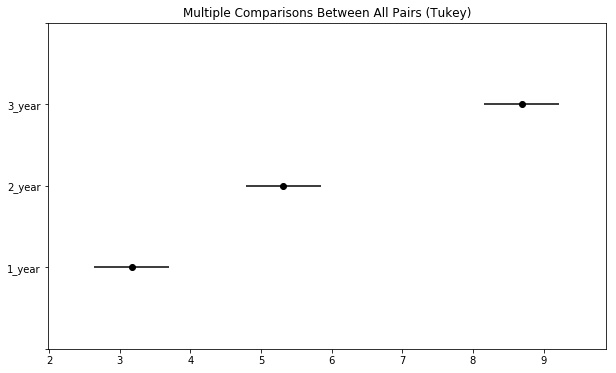

In [91]:
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['years'], alpha=0.05)
display(m_comp.summary())
m_comp.plot_simultaneous()

## Taller
Un estudio nutricional ha realizado un experimento a 78 pacientes para demostrar 3 diferentes tipos de dietas que quieren llevar al mercado. Sin embargo por falta de presupuesto solo pueden lanzar al mercado una de las dietas que experimentaron. Para ello le han propuesto realizar un estudio ANOVA para determinar cual es el tipo de dieta que deberían lanzar al mercado.

Siguiendo la metodología de ANOVA, realice los siguientes pasos:
1. Importe los datos del archivo `Diet.xlsx`
2. Realice un nuevo campo con la diferencia de peso registrado entre las 6 semanas de estudio.
3. Verifique los supuestos y realice las modificaciones necesarias. 
4. Determine si existe suficientes pruebas estadísticas para demostrar que las dietas no son iguales.
5. Determine el mejor tipo de dieta para lanzar al mercado

Un expertó sugirió que el peso de los pacientes no sólo influía por la dieta realizada, sino también por el género del paciente. Por lo tanto le pidió que repita el procedimiento anterior realizando un ANOVA de dos factores para determinar cual es la mejor dieta para cada género.

In [92]:
from imblearn.under_sampling import RandomUnderSampler

# 1. Importacion de datos

In [93]:
data =pd.read_excel('Diet.xlsx')

In [94]:
data.head()

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


# 2. Nuevo campo

In [95]:
data['Diferencia']=data['weight6weeks']-data['weight']
data.head()

,gender,Diet,weight,weight6weeks,Diferencia
0,M,B,60,60.0,0.0
1,M,B,103,103.0,0.0
2,F,A,58,54.2,-3.8
3,F,A,60,54.0,-6.0
4,F,A,64,63.3,-0.7


# 3. Verifique los supuestos y realice las modificaciones necesarias.

In [96]:
data_prueba = data[['Diet','Diferencia']]

In [97]:
data['Diet'].value_counts()

B    27
C    27
A    24
Name: Diet, dtype: int64

In [98]:
undersample = RandomUnderSampler(sampling_strategy='all')
X, y = undersample.fit_resample(data_prueba['Diferencia'].values.reshape(-1,1), data_prueba['Diet'])
data_balanced = pd.DataFrame({'Diet':y,'Diferencia':X.reshape(-1)})

El data set esta desbalanceao para los niveles de la dieta.Se procede a hacer un muestreo aleatoreo.

In [99]:
data_balanced['Diet'].value_counts()

B    24
A    24
C    24
Name: Diet, dtype: int64

In [100]:
# data_balanced

In [101]:

diet = pd.DataFrame()
dic = {}
for i in data_balanced['Diet'].unique():
    dic[i]= data_balanced[data_balanced['Diet']==i]['Diferencia'].values
    

In [102]:
# d.columns.tolist()

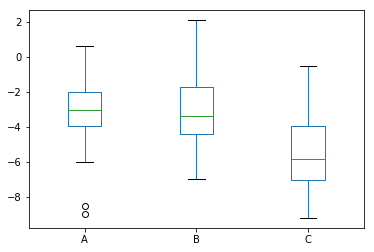

In [103]:
d = pd.DataFrame(dic)
d.boxplot(column=d.columns.tolist(), grid=False)

In [106]:
data_balanced
model = ols('Diferencia ~ C(Diet)', data=data_balanced).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),77.31250,2.0,7.112821,0.001554
Residual,374.99625,69.0,NaN,NaN


In [107]:
w, pvalue = stats.levene(d['A'], d['B'], d['C'])
print(w, pvalue)

0.36088403259170887 0.6983676498139526


Como el valor P no es significativo (> 0.05), no podemos rechazar la hipótesis nula de igualdad de varianzas. Comportamiento igual de varianzas.

In [108]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9907512664794922 0.8804509043693542


Como el valor P no es significativo, no podemos rechazar la hipótesis nula y concluir que los datos se extraen de una distribución normal.Comportamiento normal  para todas las clases.

# 4. Determine si existe suficientes pruebas estadísticas para demostrar que las dietas no son iguales.

In [109]:
data_balanced

,Diet,Diferencia
0,A,-8.5
1,A,-3.5
2,A,-3.5
3,A,-4.1
4,A,-5.1
...,...,...
67,C,-5.3
68,C,-6.1
69,C,-5.4
70,C,-2.8


In [110]:
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'])
print(fvalue, pvalue)

7.112821128211281 0.0015538953680259897


In [111]:
data_balanced
model = ols('Diferencia ~ C(Diet)', data=data_balanced).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),77.31250,2.0,7.112821,0.001554
Residual,374.99625,69.0,NaN,NaN


El p_value obtenido del análisi ANOVA para dieta es estadisticamente  significtaivo (P< 0.05) lo que permite rechazar la H0: todas las medias son iguales. De lo anterior se entiende que almenos una media es diferente de las demas.

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,0.25,0.9,-1.362,1.862,False
A,C,-2.0625,0.0086,-3.6745,-0.4505,True
B,C,-2.3125,0.0028,-3.9245,-0.7005,True


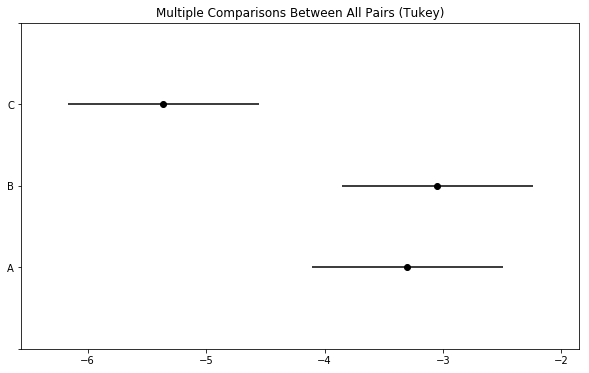

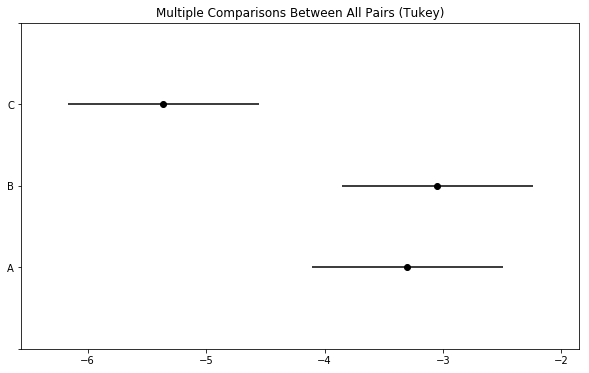

In [114]:
m_comp = pairwise_tukeyhsd(endog=data_balanced['Diferencia'], groups=data_balanced['Diet'], alpha=0.05)
display(m_comp.summary())
m_comp.plot_simultaneous()

Los resultados anteriores de Tukey HSD sugieren que la dieta C es diferente a todas las demas  en donde es posible rechazar la H0: no hay diferencias etadistiamente significativas. En ese setido se afirma que existe evidencia estadisticamente significativa  para inicar que hay diferencias  entre la dieta C y las demas. para el caso de los pares de Dieta A-B no se ecuentra suficiente evidencia estadistica y se concluye que no hay diferencia entre estos dos tipos de dieta.

# 5. Determine el mejor tipo de dieta para lanzar al mercado

Con los resultados anteriores se entiende que: La dieta C es diferentes de las demas y no se puede determinara las diatas A y B como difeerentes entre ellas. Revisando los valores para cada dieta y el valor de la  diferencia de medias se entiende que la dieta C es la que precenta valores mas negativos para la diferencia en el peso. Esto indica que la dieta C es la major a la hora de reducir el peso  comparativamente con las dietas A y B.

# 6. Dos vias

In [115]:
data.columns

Index(['gender', 'Diet', 'weight', 'weight6weeks', 'Diferencia'], dtype='object')

In [116]:
data_prueba = data[['Diet','Diferencia','gender']]

In [123]:
data_prueba.head()

,Diet,Diferencia,gender
0,B,0.0,M
1,B,0.0,M
2,A,-3.8,F
3,A,-6.0,F
4,A,-0.7,F


In [130]:
data_prueba['Diet'].value_counts()

B    27
C    27
A    24
Name: Diet, dtype: int64

In [117]:
data_prueba['gender'].value_counts()

F    43
M    35
Name: gender, dtype: int64

In [118]:
data_prueba['gender'].value_counts().min()

35

In [192]:
undersample = RandomUnderSampler(sampling_strategy='all')
X, y = undersample.fit_resample(data_prueba[['Diferencia','Diet']], data_prueba['gender'])
data_balanced = pd.DataFrame({'gender':y,'Diferencia':X['Diferencia'],'Diet':X['Diet']})



In [193]:
data_balanced['Diet'].value_counts()

B    24
C    24
A    22
Name: Diet, dtype: int64

In [194]:
data_balanced['gender'].value_counts()

F    35
M    35
Name: gender, dtype: int64

In [195]:
undersample = RandomUnderSampler(sampling_strategy='all')
X, y = undersample.fit_resample(data_balanced[['Diferencia','gender']], data_balanced['Diet'])
data_balanced = pd.DataFrame({'Diet':y,'Diferencia':X['Diferencia'],'gender':X['gender']})

In [196]:
data_balanced['Diet'].value_counts()

B    22
A    22
C    22
Name: Diet, dtype: int64

In [197]:
data_balanced['gender'].value_counts()

F    34
M    32
Name: gender, dtype: int64

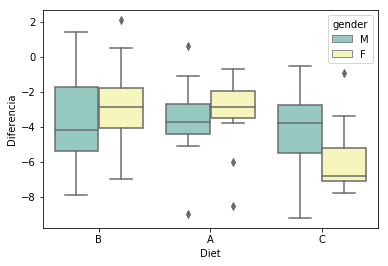

In [199]:
sns.boxplot(x="Diet", y="Diferencia", hue="gender", data=data_prueba, palette="Set3") 

In [204]:
model = ols('Diferencia ~ C(Diet) + C(gender) + C(Diet):C(gender)', data=data_prueba).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.007031,2.0,6.313248,0.002977
C(gender),0.135526,1.0,0.024099,0.877067
C(Diet):C(gender),25.140704,2.0,2.235264,0.114336
Residual,404.903029,72.0,NaN,NaN


In [210]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=data_prueba, res_var='Diferencia', xfac_var='Diet', anova_model='Diferencia ~ C(Diet) + C(gender) + C(Diet):C(gender)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,B,A,0.274074,-1.318046,1.866194,0.582608,0.900000
1,B,C,2.122222,0.577639,3.666806,4.650113,0.004402
2,A,C,1.848148,0.256028,3.440268,3.928664,0.018870


In [211]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=data_prueba, res_var='Diferencia', xfac_var='gender', anova_model='Diferencia ~ C(Diet) + C(gender) + C(Diet):C(gender)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,M,F,0.107309,-0.9689,1.183518,0.281101,0.847329


In [212]:
res.tukey_hsd(df=data_prueba, res_var='Diferencia', xfac_var=['Diet','gender'], anova_model='Diferencia ~ C(Diet) + C(gender) + C(Diet):C(gender)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(B, M)","(B, F)",0.869780,-1.804407,3.543967,1.346694,0.900000
1,"(B, M)","(A, M)",0.173077,-2.747292,3.093446,0.245388,0.900000
2,"(B, M)","(A, F)",0.426923,-2.247264,3.101110,0.661012,0.900000
3,"(B, M)","(C, M)",0.756410,-2.023004,3.535824,1.126822,0.900000
4,"(B, M)","(C, F)",2.403077,-0.227841,5.033995,3.781914,0.093072
5,"(B, F)","(A, M)",1.042857,-1.831807,3.917522,1.502066,0.892905
6,"(B, F)","(A, F)",0.442857,-2.181340,3.067055,0.698745,0.900000
7,"(B, F)","(C, M)",1.626190,-1.105161,4.357542,2.465160,0.506967
8,"(B, F)","(C, F)",3.272857,0.692767,5.852947,5.252226,0.005170
9,"(A, M)","(A, F)",0.600000,-2.274664,3.474664,0.864202,0.900000


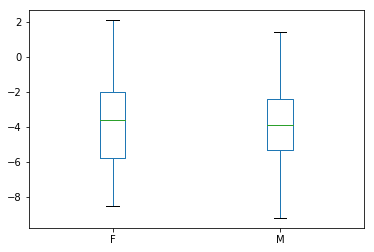

In [218]:
undersample = RandomUnderSampler(sampling_strategy='all')
X, y = undersample.fit_resample(data_prueba[['Diferencia','Diet']], data_prueba['gender'])
data_balanced_gender = pd.DataFrame({'gender':y,'Diferencia':X['Diferencia'],'Diet':X['Diet']})


dic = {}
for i in data_balanced_gender['gender'].unique():
    dic[i]= data_balanced_gender[data_balanced_gender['gender']==i]['Diferencia'].values
d = pd.DataFrame(dic)
d.boxplot(column=d.columns.tolist(), grid=False)

In [220]:
w, pvalue = stats.levene(d['F'], d['M'])
print(w, pvalue)

0.008198560563182362 0.9281196058603366


Como el valor P no es significativo (> 0.05), no podemos rechazar la hipótesis nula de igualdad de varianzas. Comportamiento igual de varianzas.

In [216]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9798329472541809 0.2526903450489044


Como el valor P no es significativo, no podemos rechazar la hipótesis nula y concluir que los datos se extraen de una distribución normal.Comportamiento normal  para todas las clases.

De el test Tukey para las parejas de grupos , solo se evidencio para las mujeres con dieta C con respecto a las mujeres con dieta A y B que hay evidemcia estadistica significativa para decir que son diferentes. En ese sentido teniendo en cuenta el genero , solo se evidencia que la dieta c es mejor que las demas para las mujeres.